# Import modules

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Data Import

In [5]:
country_data = pd.read_csv("~/projects/ava-assignment/data/tuberculosis_data/Country_Master_Data.csv")
data_after_2000 = pd.read_csv("~/projects/ava-assignment/data/tuberculosis_data/Data_after_2000.csv")
data_before_2000 = pd.read_csv("~/projects/ava-assignment/data/tuberculosis_data/Data_before_2000.csv")

/tmp/ipykernel_21172/3406818599.py:3: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  data_before_2000 = pd.read_csv("~/projects/ava-assignment/data/tuberculosis_data/Data_before_2000.csv")


In [7]:
print(country_data.info())
print("-"*50)
print(data_after_2000.info())
print("-"*50)
print(data_before_2000.info())
print("-"*50)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   country  219 non-null    object
 1   iso2     218 non-null    object
 2   iso3     219 non-null    object
dtypes: object(3)
memory usage: 5.3+ KB
None
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 59 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   iso2          2986 non-null   object 
 1   iso3          3000 non-null   object 
 2   year          3000 non-null   int64  
 3   new_sp_m014   2390 non-null   float64
 4   new_sp_m1524  2426 non-null   float64
 5   new_sp_m2534  2423 non-null   float64
 6   new_sp_m3544  2436 non-null   float64
 7   new_sp_m4554  2441 non-null   float64
 8   new_sp_m5564  2436 non-null   float64
 9   new_sp_m65    2427 non-null   

# Data Processing

In [5]:
combined_data = pd.concat([data_before_2000, data_after_2000])
combined_data = combined_data[combined_data["iso2"].isin(["NO", "IN", "AF"])]
combined_data = combined_data.reset_index(drop=True)
combined_data["year"] = combined_data["year"].astype(int)

columns_to_check = list(combined_data.columns)
remove_columns = ["iso2", "iso3", "year"]
for column in remove_columns:
    columns_to_check.remove(column)
combined_data = combined_data.dropna(subset=columns_to_check, how="all")
combined_data = combined_data.reset_index(drop=True)

In [6]:
country_data[:3]

,country,iso2,iso3
0,Afghanistan,AF,AFG
1,Albania,AL,ALB
2,Algeria,DZ,DZA


In [7]:
country_data_filtered = country_data.drop("iso2", axis=1)
combined_data = pd.merge(left=combined_data, right=country_data_filtered, on="iso3")

In [8]:
age_groups = ["014", "1524", "2534", "3544", "4554", "5564", "65"]
for age_group in age_groups:
    combined_data[f"total_m_{age_group}"] = (
        combined_data[f"new_sp_m{age_group}"].fillna(0) + 
        # combined_data[f"new_sn_m{age_group}"].fillna(0) + 
        combined_data[f"new_ep_m{age_group}"].fillna(0) + 
        combined_data[f"newrel_m{age_group}"].fillna(0)
    )

    combined_data[f"total_f_{age_group}"] = (
        combined_data[f"new_sp_f{age_group}"].fillna(0) + 
        # combined_data[f"new_sn_f{age_group}"].fillna(0) + 
        combined_data[f"new_ep_f{age_group}"].fillna(0) + 
        combined_data[f"newrel_f{age_group}"].fillna(0)
    )

In [9]:
combined_data.head()

,iso2,iso3,year,new_sp_m014,new_sp_m1524,new_sp_m2534,new_sp_m3544,new_sp_m4554,new_sp_m5564,new_sp_m65,new_sp_f014,new_sp_f1524,new_sp_f2534,new_sp_f3544,new_sp_f4554,new_sp_f5564,new_sp_f65,new_sn_m014,new_sn_m1524,new_sn_m2534,new_sn_m3544,new_sn_m4554,new_sn_m5564,new_sn_m65,new_sn_f014,new_sn_f1524,new_sn_f2534,new_sn_f3544,new_sn_f4554,new_sn_f5564,new_sn_f65,new_ep_m014,new_ep_m1524,new_ep_m2534,new_ep_m3544,new_ep_m4554,new_ep_m5564,new_ep_m65,new_ep_f014,new_ep_f1524,new_ep_f2534,new_ep_f3544,new_ep_f4554,new_ep_f5564,new_ep_f65,newrel_m014,newrel_m1524,newrel_m2534,newrel_m3544,newrel_m4554,newrel_m5564,newrel_m65,newrel_f014,newrel_f1524,newrel_f2534,newrel_f3544,newrel_f4554,newrel_f5564,newrel_f65,country,total_m_014,total_f_014,total_m_1524,total_f_1524,total_m_2534,total_f_2534,total_m_3544,total_f_3544,total_m_4554,total_f_4554,total_m_5564,total_f_5564,total_m_65,total_f_65
0,AF,AFG,1997,0.0,10.0,6.0,3.0,5.0,2.0,0.0,5.0,38.0,36.0,14.0,8.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Afghanistan,0.0,5.0,10.0,38.0,6.0,36.0,3.0,14.0,5.0,8.0,2.0,0.0,0.0,1.0
1,AF,AFG,1998,30.0,129.0,128.0,90.0,89.0,64.0,41.0,45.0,350.0,419.0,194.0,118.0,61.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Afghanistan,30.0,45.0,129.0,350.0,128.0,419.0,90.0,194.0,89.0,118.0,64.0,61.0,41.0,20.0
2,AF,AFG,1999,8.0,55.0,55.0,47.0,34.0,21.0,8.0,25.0,139.0,160.0,110.0,50.0,25.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Afghanistan,8.0,25.0,55.0,139.0,55.0,160.0,47.0,110.0,34.0,50.0,21.0,25.0,8.0,8.0
3,IN,IND,1995,16.0,334.0,391.0,287.0,216.0,123.0,68.0,32.0,179.0,169.0,80.0,49.0,30.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,India,16.0,32.0,334.0,179.0,391.0,169.0,287.0,80.0,216.0,49.0,123.0,30.0,68.0,11.0
4,IN,IND,1996,47.0,966.0,1143.0,934.0,666.0,424.0,213.0,79.0,618.0,571.0,281.0,167.0,103.0,42.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,India,47.0,79.0,966.0,618.0,1143.0,571.0,934.0,281.0,666.0,167.0,424.0,103.0,213.0,42.0


# Visualization

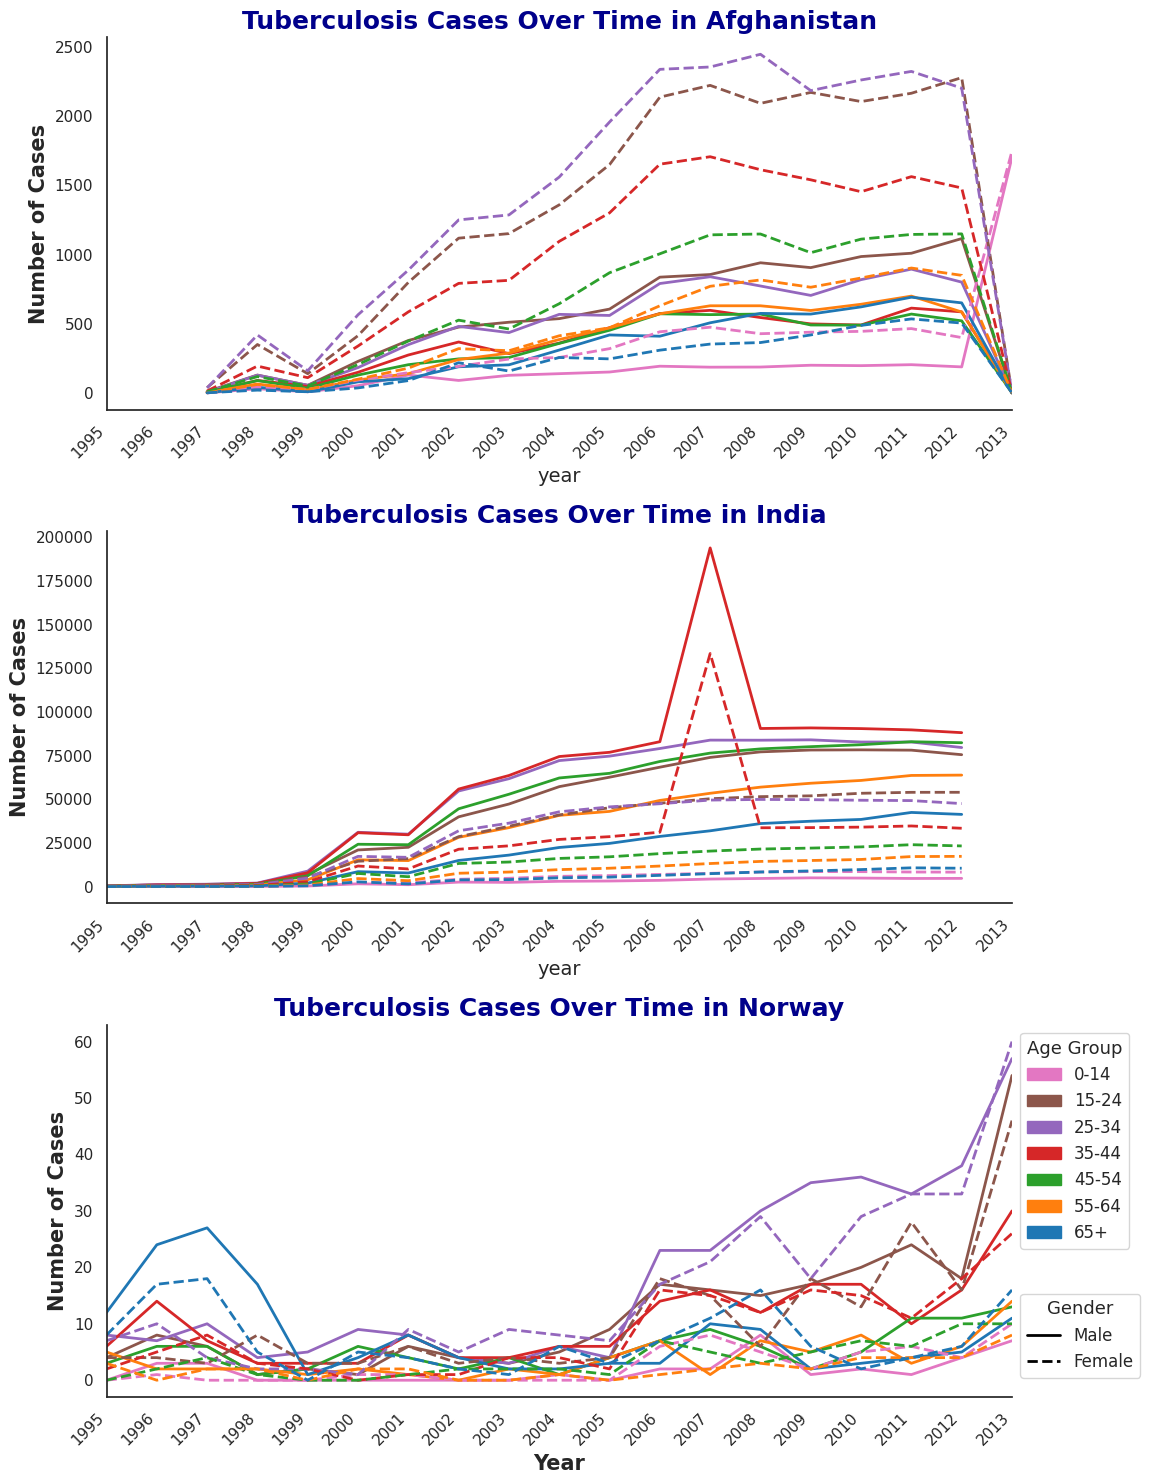

In [11]:
genders = ["m", "f"]

columns_to_aggregate = [
    f"total_{gender}_{age_group}" for gender in genders for age_group in age_groups
]

df_melted = pd.melt(
    combined_data,
    id_vars=["country", "year"],
    value_vars=columns_to_aggregate,
    var_name="demographic",
    value_name="cases"
)

df_melted["gender"] = df_melted["demographic"].str.extract(r"total_([mf])")
df_melted["age_group"] = df_melted["demographic"].str.extract(r"(\d{2,})$")

age_group_map = {
    "014": "0-14",
    "1524": "15-24",
    "2534": "25-34",
    "3544": "35-44",
    "4554": "45-54",
    "5564": "55-64",
    "65": "65+"
}
df_melted["age_group"] = df_melted["age_group"].map(age_group_map)

unique_countries = df_melted["country"].unique()

viridis_palette = sns.color_palette("tab10", len(age_group_map))[::-1]
sns.set_theme(style="white", rc={"axes.titlesize": 16, "axes.labelsize": 14, "legend.fontsize": 12})

global_min_year = df_melted["year"].min()
global_max_year = df_melted["year"].max()

fig, axes = plt.subplots(len(unique_countries), 1, figsize=(12, 5 * len(unique_countries)), sharex=False)

year_range = list(range(global_min_year, global_max_year + 1))

for i, country in enumerate(unique_countries):
    ax = axes[i] if len(unique_countries) > 1 else axes
    country_data = df_melted[df_melted["country"] == country]

    male_data = country_data[country_data["gender"] == "m"]
    sns.lineplot(
        data=male_data,
        x="year",
        y="cases",
        hue="age_group",
        palette=viridis_palette,
        linewidth=2,
        linestyle="-",
        ax=ax,
        legend=False
    )

    female_data = country_data[country_data["gender"] == "f"]
    sns.lineplot(
        data=female_data,
        x="year",
        y="cases",
        hue="age_group",
        palette=viridis_palette,
        linewidth=2,
        linestyle="--",
        ax=ax,
        legend=False
    )

    ax.set_title(f"Tuberculosis Cases Over Time in {country}", fontsize=18, weight="bold", color="darkblue")
    ax.set_ylabel("Number of Cases", fontsize=15, weight="bold")

    ax.set_xlim(global_min_year, global_max_year)

    ax.set_xticks(year_range)
    ax.set_xticklabels(year_range, rotation=45, ha="right")

    ax.grid(False)

    sns.despine(ax=ax, left=False, bottom=False)

axes[-1].set_xlabel("Year", fontsize=15, weight="bold")

age_group_handles = [
    mpatches.Patch(color=viridis_palette[idx], label=label)
    for idx, label in enumerate(age_group_map.values())
]

gender_handles = [
    plt.Line2D([0], [1], color="black", linestyle="-", label="Male", linewidth=2),
    plt.Line2D([0], [1], color="black", linestyle="--", label="Female", linewidth=2)
]

age_legend = axes[-1].legend(handles=age_group_handles, title="Age Group", bbox_to_anchor=(1, 1), loc="upper left", title_fontsize="13", fancybox=True, frameon=True)
gender_legend = axes[-1].legend(handles=gender_handles, title="Gender", bbox_to_anchor=(1, 0.3), loc="upper left", title_fontsize="13", fancybox=True, frameon=True)

axes[-1].add_artist(age_legend)

plt.tight_layout()
plt.subplots_adjust(right=0.85)

plt.savefig("export/tuberculosis_cases_over_time.png", dpi=300, bbox_inches="tight")
plt.show()
